# DS Processing

In this tutorial, we demostrate how to do DS processing with the decorrelation CLI interface.
The input data for DS processing is prepared in [Load Data](./load_data.ipynb).

In [ ]:
!ls ./load_data

e.zarr	  lat.zarr  meta.toml  phi.zarr    rslc_pyramid  scratch
hgt.zarr  lon.zarr  n.zarr     range.zarr  rslc.zarr	 theta.zarr


## SHP selection

Here we use two sample Kolmogorov-Smirnov (KS) test for Spatially Homogenious Pixel (SHP) identification.

The output `pvalue` is the P-value for this test.
The smaller the p-value, the more likely the two sample are from same distribution, i.e.,
the more likely the two pixels are SHP to each other.

In [ ]:
import numpy as np
import moraine.cli as mc
import moraine as mr

In [ ]:
rslc = './load_data/rslc.zarr'
pvalue = './ds_processing/gix/ras_pvalue.zarr'
az_half_win = 5
r_half_win = 5
method = 'ks'

In [ ]:
logger = mc.get_logger()

In [ ]:
mc.shp_test(rslc,pvalue,
            az_half_win=az_half_win,r_half_win=r_half_win)

2025-10-23 21:48:10 - log_args - INFO - running function: shp_test
2025-10-23 21:48:10 - log_args - INFO - fetching args:
2025-10-23 21:48:10 - log_args - INFO - rslc = './load_data/rslc.zarr'
2025-10-23 21:48:10 - log_args - INFO - pvalue = './ds_processing/gix/ras_pvalue.zarr'
2025-10-23 21:48:10 - log_args - INFO - az_half_win = 5
2025-10-23 21:48:10 - log_args - INFO - r_half_win = 5
2025-10-23 21:48:10 - log_args - INFO - method = None
2025-10-23 21:48:10 - log_args - INFO - chunks = None
2025-10-23 21:48:10 - log_args - INFO - cuda = False
2025-10-23 21:48:10 - log_args - INFO - processes = None
2025-10-23 21:48:10 - log_args - INFO - n_workers = None
2025-10-23 21:48:10 - log_args - INFO - threads_per_worker = None
2025-10-23 21:48:10 - log_args - INFO - rmm_pool_size = 0.9
2025-10-23 21:48:10 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:48:10 - log_args - INFO - fetching args done.
2025-10-23 21:48:10 - shp_test - INFO - hypothetic test method: ks
2025-10-23 21:48:10

Then we select SHP by setting a threshold on this Pvalue:

In [ ]:
import zarr
from matplotlib import pyplot as plt
import colorcet

In [ ]:
is_shp = './ds_processing/gix/ras_is_shp.zarr'
shp_num = './ds_processing/gix/ras_shp_num.zarr'
p_max = 0.05

In [ ]:
mc.select_shp(pvalue,is_shp,shp_num,p_max=p_max)

2025-10-23 21:48:30 - log_args - INFO - running function: select_shp
2025-10-23 21:48:30 - log_args - INFO - fetching args:
2025-10-23 21:48:30 - log_args - INFO - pvalue = './ds_processing/gix/ras_pvalue.zarr'
2025-10-23 21:48:30 - log_args - INFO - is_shp = './ds_processing/gix/ras_is_shp.zarr'
2025-10-23 21:48:30 - log_args - INFO - shp_num = './ds_processing/gix/ras_shp_num.zarr'
2025-10-23 21:48:30 - log_args - INFO - p_max = 0.05
2025-10-23 21:48:30 - log_args - INFO - chunks = None
2025-10-23 21:48:30 - log_args - INFO - processes = False
2025-10-23 21:48:30 - log_args - INFO - n_workers = 1
2025-10-23 21:48:30 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:48:30 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:48:30 - log_args - INFO - fetching args done.
2025-10-23 21:48:30 - zarr_info - INFO - ./ds_processing/gix/ras_pvalue.zarr zarray shape, chunks, dtype: (2500, 1834, 11, 11), (1000, 1000, 1, 1), float32
2025-10-23 21:48:30 - select_shp - INFO - starting da

The output `is_shp` indicate wheather a pixel in the window is a SHP to its center pixel.

In [ ]:
shp_num_zarr = zarr.open(shp_num,mode='r')
shp_num_data = shp_num_zarr[:]
shp_num_plot = mr.plot.ras_plot(shp_num_data)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
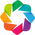

In [ ]:
import holoviews as hv
hv.extension('bokeh')
from bokeh.models import WheelZoomTool
from holoviews import opts

In [ ]:
shp_num_plot = shp_num_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('n_shp',))

In [ ]:
shp_num_plot.opts(opts.Image(cmap='viridis',width=600, height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (n_shp)

## DS candidates selection

In [ ]:
ds_can_gix = './ds_processing/gix/ds_can_gix.zarr'
is_ds_can = './ds_processing/gix/ras_is_ds_can.zarr'

In [ ]:
mc.pc_logic_ras(shp_num,ds_can_gix,'ras>=50',chunks=200000)
mc.gix2bool(ds_can_gix, is_ds_can, shape= shp_num_zarr.shape)

2025-10-23 21:48:42 - log_args - INFO - running function: pc_logic_ras
2025-10-23 21:48:42 - log_args - INFO - fetching args:
2025-10-23 21:48:42 - log_args - INFO - ras = './ds_processing/gix/ras_shp_num.zarr'
2025-10-23 21:48:42 - log_args - INFO - gix = './ds_processing/gix/ds_can_gix.zarr'
2025-10-23 21:48:42 - log_args - INFO - operation = 'ras>=50'
2025-10-23 21:48:42 - log_args - INFO - chunks = 200000
2025-10-23 21:48:42 - log_args - INFO - fetching args done.
2025-10-23 21:48:42 - zarr_info - INFO - ./ds_processing/gix/ras_shp_num.zarr zarray shape, chunks, dtype: (2500, 1834), (1000, 1000), int32
2025-10-23 21:48:42 - pc_logic_ras - INFO - loading ras into memory.
2025-10-23 21:48:42 - pc_logic_ras - INFO - select pc based on operation: ras>=50
2025-10-23 21:48:42 - pc_logic_ras - INFO - number of selected pixels: 732727.
2025-10-23 21:48:42 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (732727, 2), (200000, 1), int32
2025-10-23 21:48:4

`ds_can_idx` is a int array with shape of (num_of_DS_can, 2). It indicate the position of DS candidate in radar coordinate.

In [ ]:
is_ds_can_zarr = zarr.open(is_ds_can,mode='r')
is_ds_can_data = is_ds_can_zarr[:]
is_ds_can_plot = mr.ras_plot(is_ds_can_data)

In [ ]:
is_ds_can_plot = is_ds_can_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('is_ds_can',))
is_ds_can_plot.opts(opts.Image(cmap='viridis',width=600, height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (is_ds_can)

## Coherence matrix estimation

The coherence matrix estimation is kind of complicated as it involves both raster and point cloud data. We also want to save the output point cloud data in the hilbert order.

First, we generate DS candidate point cloud `is_shp` by ras chunks (which is a directory): 

In [ ]:
ds_can_is_shp_dir = './ds_processing/gix/ds_can_is_shp'
ds_can_key = './ds_processing/gix/ds_can_key.zarr'

In [ ]:
mc.ras2pc_ras_chunk(ds_can_gix,is_shp,ds_can_is_shp_dir,ds_can_key,chunks=(1000,1000))

2025-10-23 21:48:42 - log_args - INFO - running function: ras2pc_ras_chunk
2025-10-23 21:48:42 - log_args - INFO - fetching args:
2025-10-23 21:48:42 - log_args - INFO - gix = './ds_processing/gix/ds_can_gix.zarr'
2025-10-23 21:48:42 - log_args - INFO - ras = './ds_processing/gix/ras_is_shp.zarr'
2025-10-23 21:48:42 - log_args - INFO - pc = './ds_processing/gix/ds_can_is_shp'
2025-10-23 21:48:42 - log_args - INFO - key = './ds_processing/gix/ds_can_key.zarr'
2025-10-23 21:48:42 - log_args - INFO - chunks = (1000, 1000)
2025-10-23 21:48:42 - log_args - INFO - processes = False
2025-10-23 21:48:42 - log_args - INFO - n_workers = 1
2025-10-23 21:48:42 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:48:42 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:48:42 - log_args - INFO - fetching args done.
2025-10-23 21:48:42 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (732727, 2), (200000, 1), int32
2025-10-23 21:48:42 - ras2pc_ras_chunk -

Then we estimate the coherence matrix:

In [ ]:
ds_can_coh_dir = './ds_processing/gix/ds_can_coh'

In [ ]:
mc.emperical_co_pc(rslc,ds_can_is_shp_dir,ds_can_gix,ds_can_coh_dir,cuda=True)

2025-10-23 21:48:51 - log_args - INFO - running function: emperical_co_pc
2025-10-23 21:48:51 - log_args - INFO - fetching args:
2025-10-23 21:48:51 - log_args - INFO - rslc = './load_data/rslc.zarr'
2025-10-23 21:48:51 - log_args - INFO - is_shp_dir = './ds_processing/gix/ds_can_is_shp'
2025-10-23 21:48:51 - log_args - INFO - gix = './ds_processing/gix/ds_can_gix.zarr'
2025-10-23 21:48:51 - log_args - INFO - coh_dir = './ds_processing/gix/ds_can_coh'
2025-10-23 21:48:51 - log_args - INFO - image_pairs = None
2025-10-23 21:48:51 - log_args - INFO - chunks = None
2025-10-23 21:48:51 - log_args - INFO - cuda = True
2025-10-23 21:48:51 - log_args - INFO - processes = None
2025-10-23 21:48:51 - log_args - INFO - n_workers = None
2025-10-23 21:48:51 - log_args - INFO - threads_per_worker = None
2025-10-23 21:48:51 - log_args - INFO - rmm_pool_size = 0.9
2025-10-23 21:48:51 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:48:51 - log_args - INFO - fetching args done.
2025-10-23 21:48:

2025-10-23 21:48:54,397 - distributed.worker - WARNING - Setting CPU affinity for GPU failed. Please refer to the following link for troubleshooting information: https://docs.rapids.ai/api/dask-cuda/nightly/troubleshooting/#setting-cpu-affinity-failure
2025-10-23 21:48:54,407 - distributed.worker - WARNING - Setting CPU affinity for GPU failed. Please refer to the following link for troubleshooting information: https://docs.rapids.ai/api/dask-cuda/nightly/troubleshooting/#setting-cpu-affinity-failure


2025-10-23 21:48:55 - emperical_co_pc - INFO - dask cluster started.
2025-10-23 21:48:55 - dask_cluster_info - INFO - dask cluster: LocalCUDACluster(dashboard_link='http://127.0.0.1:8787/status', workers=2, threads=2, memory=256.00 GiB)
2025-10-23 21:48:55 - darr_info - INFO - rslc_overlap dask array shape, chunksize, dtype: (2520, 1844, 17), (1010, 1005, 17), complex64
2025-10-23 21:48:55 - darr_info - INFO - gix in ras chunk order dask array shape, chunksize, dtype: (732727, 2), (201403, 2), int32
2025-10-23 21:48:55 - emperical_co_pc - INFO - estimating coherence matrix chunk by chunk.
2025-10-23 21:48:55 - darr_info - INFO - is_shp for chunk 0 dask array shape, chunksize, dtype: (201097, 11, 11), (201097, 11, 11), bool
2025-10-23 21:48:55 - darr_info - INFO - coh for chunk 0 dask array shape, chunksize, dtype: (201097, 136), (201097, 136), complex64
2025-10-23 21:48:55 - emperical_co_pc - INFO - saving coh for chunk 0
2025-10-23 21:48:55 - zarr_info - INFO - ds_processing/gix/ds_ca

The output of `emperical_co_pc` is point cloud data in the raster chunk order.
So we prepare the key to sort the point cloud data to hilbert order (the hillbert index of DS candidate can be generated by the way):

In [ ]:
ds_can_hix_unsorted = './ds_processing/gix/ds_can_hix.zarr'
ds_can_hix = './ds_processing/hix/ds_can/ds_can_hix.zarr'
gix2hix_key = './ds_processing/gix/gix2hix.zarr'

In [ ]:
mc.pc_hix(ds_can_gix, ds_can_hix_unsorted, shape=zarr.open(rslc,mode='r').shape[:2])
mc.pc_sort(
    ds_can_hix_unsorted, ds_can_hix,
    shape=zarr.open(rslc,mode='r').shape[:2],
    pc_in = './ds_processing/gix/ds_can_gix.zarr',
    pc = './ds_processing/hix/ds_can/ds_can_gix.zarr',
    key=gix2hix_key,
)

2025-10-23 21:49:01 - log_args - INFO - running function: pc_hix
2025-10-23 21:49:01 - log_args - INFO - fetching args:
2025-10-23 21:49:01 - log_args - INFO - gix = './ds_processing/gix/ds_can_gix.zarr'
2025-10-23 21:49:01 - log_args - INFO - hix = './ds_processing/gix/ds_can_hix.zarr'
2025-10-23 21:49:01 - log_args - INFO - shape = (2500, 1834)
2025-10-23 21:49:01 - log_args - INFO - fetching args done.
2025-10-23 21:49:01 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (732727, 2), (200000, 1), int32
2025-10-23 21:49:01 - zarr_info - INFO - ./ds_processing/gix/ds_can_hix.zarr zarray shape, chunks, dtype: (732727,), (200000,), int64
2025-10-23 21:49:01 - pc_hix - INFO - calculating the hillbert index based on grid index
2025-10-23 21:49:03 - pc_hix - INFO - writing the hillbert index
2025-10-23 21:49:03 - pc_hix - INFO - done.
2025-10-23 21:49:03 - log_args - INFO - running function: pc_sort
2025-10-23 21:49:03 - log_args - INFO - fetching args:


Then concat and sort `ds_can_coh` to hilbert order:

In [ ]:
ds_can_coh = './ds_processing/hix/ds_can/ds_can_coh.zarr'
ds_can_coh_ave = './ds_processing/hix/ds_can/ds_can_coh_ave.zarr'

In [ ]:
chunks = zarr.open(ds_can_gix,mode='r').chunks[0]
mc.pc_concat(ds_can_coh_dir,ds_can_coh,key=[ds_can_key,gix2hix_key],chunks=chunks)

2025-10-23 21:49:03 - log_args - INFO - running function: pc_concat
2025-10-23 21:49:03 - log_args - INFO - fetching args:
2025-10-23 21:49:03 - log_args - INFO - pcs = './ds_processing/gix/ds_can_coh'
2025-10-23 21:49:03 - log_args - INFO - pc = './ds_processing/hix/ds_can/ds_can_coh.zarr'
2025-10-23 21:49:03 - log_args - INFO - key = ['./ds_processing/gix/ds_can_key.zarr', './ds_processing/gix/gix2hix.zarr']
2025-10-23 21:49:03 - log_args - INFO - chunks = 200000
2025-10-23 21:49:03 - log_args - INFO - processes = False
2025-10-23 21:49:03 - log_args - INFO - n_workers = 1
2025-10-23 21:49:03 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:49:03 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:49:03 - log_args - INFO - fetching args done.
2025-10-23 21:49:03 - pc_concat - INFO - input pcs: [[PosixPath('ds_processing/gix/ds_can_coh/0.zarr'), PosixPath('ds_processing/gix/ds_can_coh/1.zarr'), PosixPath('ds_processing/gix/ds_can_coh/2.zarr'), PosixPath('ds_processing/gix/

In [ ]:
n_points = zarr.open(ds_can_coh,mode='r').shape[0]
mc.data_reduce(ds_can_coh,ds_can_coh_ave,map_func=np.abs,reduce_func=np.sum,post_map_func=lambda x: x/n_points)

2025-10-23 21:49:09 - log_args - INFO - running function: data_reduce
2025-10-23 21:49:09 - log_args - INFO - fetching args:
2025-10-23 21:49:09 - log_args - INFO - data_in = './ds_processing/hix/ds_can/ds_can_coh.zarr'
2025-10-23 21:49:09 - log_args - INFO - out = './ds_processing/hix/ds_can/ds_can_coh_ave.zarr'
2025-10-23 21:49:09 - log_args - INFO - map_func = <ufunc 'absolute'>
2025-10-23 21:49:09 - log_args - INFO - reduce_func = <function sum>
2025-10-23 21:49:09 - log_args - INFO - axis = 0
2025-10-23 21:49:09 - log_args - INFO - post_map_func = <function <lambda>>
2025-10-23 21:49:09 - log_args - INFO - processes = False
2025-10-23 21:49:09 - log_args - INFO - n_workers = 1
2025-10-23 21:49:09 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:49:09 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:49:09 - log_args - INFO - fetching args done.
2025-10-23 21:49:09 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_coh.zarr zarray shape, chunks, dtype: (732727, 13

In [ ]:
ds_can_coh_ave_zarr = zarr.open(ds_can_coh_ave,mode='r')
ds_can_coh_ave_plot = mr.plot.ras_plot(mr.uncompress_coh(ds_can_coh_ave_zarr[:]))
ds_can_coh_ave_plot = ds_can_coh_ave_plot.redim(x=hv.Dimension('sec_image', label='Secondary image'), y=hv.Dimension('ref_image',label='Reference image'), z=hv.Dimension('ds_can_coh_ave',))
ds_can_coh_ave_plot.opts(opts.Image(cmap='viridis',frame_width=600, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [sec_image,ref_image]   (ds_can_coh_ave)

## Visualize adpative multi-looked interferograms

Visualize interferograms after adaptive multi-looking and compare with the raw 1 by 1 look interferograms:

In [ ]:
mc.pc_pyramid(
    './ds_processing/hix/ds_can/ds_can_coh.zarr',
    './ds_processing/hix/ds_can/ds_can_coh_pyramid',
    yx = './ds_processing/hix/ds_can/ds_can_gix.zarr',
    ras_resolution=2,
)

2025-10-23 21:49:12 - log_args - INFO - running function: pc_pyramid
2025-10-23 21:49:12 - log_args - INFO - fetching args:
2025-10-23 21:49:12 - log_args - INFO - pc = './ds_processing/hix/ds_can/ds_can_coh.zarr'
2025-10-23 21:49:12 - log_args - INFO - out_dir = './ds_processing/hix/ds_can/ds_can_coh_pyramid'
2025-10-23 21:49:12 - log_args - INFO - x = None
2025-10-23 21:49:12 - log_args - INFO - y = None
2025-10-23 21:49:12 - log_args - INFO - yx = './ds_processing/hix/ds_can/ds_can_gix.zarr'
2025-10-23 21:49:12 - log_args - INFO - ras_resolution = 2
2025-10-23 21:49:12 - log_args - INFO - ras_chunks = (256, 256)
2025-10-23 21:49:12 - log_args - INFO - pc_chunks = 65536
2025-10-23 21:49:12 - log_args - INFO - processes = False
2025-10-23 21:49:12 - log_args - INFO - n_workers = 1
2025-10-23 21:49:12 - log_args - INFO - threads_per_worker = 2
2025-10-23 21:49:12 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:49:12 - log_args - INFO - fetching args done.
2025-10-23 21:49:12 - 

In [ ]:
rslc_zarr = zarr.open(rslc,mode='r')
tnet = mr.TempNet.from_bandwidth(rslc_zarr.shape[2])

In [ ]:
def co_phase_post_proc_ras(data_zarr,xslice,yslice,i,j):
    if i == j:
        nx = xslice.stop-xslice.start
        ny = yslice.stop-yslice.start
        mask = np.isnan(data_zarr[yslice,xslice,0])
        data = np.zeros((ny,nx),dtype=np.float32)
        data[mask] = np.nan
        return data
    elif i > j:
        ref, sec = j, i
        conj = True
    else:
        ref, sec = i, j
        conj = False
    image_pair_idx = tnet.image_pairs_idx(ref=ref,sec=sec)
    if image_pair_idx == -1:
        nx = xslice.stop-xslice.start
        ny = yslice.stop-yslice.start
        return np.full((ny,nx),fill_value=np.nan,dtype=np.float32)
    data = data_zarr[yslice,xslice,image_pair_idx]
    if conj:
        return -np.angle(data)
    else:
        return np.angle(data)

In [ ]:
def co_phase_post_proc_pc(data_zarr,idx_array,i,j):
    if i == j:
        data = np.zeros_like(idx_array,dtype=np.float32)
        return data
    elif i > j:
        ref, sec = j, i
        conj = True
    else:
        ref, sec = i, j
        conj = False
    image_pair_idx = tnet.image_pairs_idx(ref=ref,sec=sec)
    if image_pair_idx == -1:
        return np.full_like(idx_array,fill_value=np.nan,dtype=np.float32)
    data = data_zarr[idx_array,image_pair_idx]
    if conj:
        return -np.angle(data)
    else:
        return np.angle(data)

In [ ]:
ds_can_intf_plot = mc.pc_plot(
    './ds_processing/hix/ds_can/ds_can_coh_pyramid',
    post_proc_ras=co_phase_post_proc_ras,
    post_proc_pc=co_phase_post_proc_pc,
    n_kdim=2,level_increase=1)
ds_can_intf_plot = ds_can_intf_plot[0]*ds_can_intf_plot[1]
raw_intf_plot = mc.ras_plot('./load_data/rslc_pyramid',post_proc='intf_all',n_kdim=2,level_increase=1)
intf_plots = raw_intf_plot.relabel('Raw Interferograms') + ds_can_intf_plot.relabel('Adaptively multilooked Interferograms')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
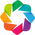

In [ ]:
import holoviews as hv
from bokeh.models import WheelZoomTool
hv.extension('bokeh')
import toml
with open('load_data/meta.toml','r') as f:
    dates = toml.load(f)['dates']
intf_plots = intf_plots.redim(
    i=hv.Dimension('i', label='Reference Image', range=(0,16), value_format=(lambda i: dates[i])),
    j=hv.Dimension('j', label='Secondary Image', range=(0,16), value_format=(lambda i: dates[i])),
    x=hv.Dimension('r', label='Range'),
    y=hv.Dimension('az',label='Azimuth'),
    z=hv.Dimension('Phase',range=(-np.pi,np.pi))
)

In [ ]:
hv.output(widget_location='bottom')
intf_plots.opts(
    hv.opts.Image(
        cmap='colorwheel',frame_width=500, frame_height=600, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        invert_yaxis=True,
    ),
    hv.opts.Points(
        color='Phase', cmap='colorwheel',frame_width=500, frame_height=600, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        invert_yaxis=True,
    ),
)

:Layout
   .DynamicMap.Raw_Interferograms                    :DynamicMap   [i,j]
      :Image   [r,az]   (Phase)
   .DynamicMap.Adaptively_multilooked_Interferograms :DynamicMap   [i,j]
      :Overlay
         .Image.I  :Image   [r,az]   (Phase,idx)
         .Points.I :Points   [r,az]   (Phase,idx)

## Phase linking

To get rid of the closure phase, phase linking is applied here:

In [ ]:
ds_can_coh = './ds_processing/hix/ds_can/ds_can_coh.zarr'
ds_can_ph = './ds_processing/hix/ds_can/ds_can_ph.zarr'
ds_can_emi_quality = './ds_processing/hix/ds_can/ds_can_emi_quality.zarr'
emi_quality = './ds_processing/hix/ds_can/ras_ds_can_emi_quality.zarr'

In [ ]:
mc.emi(ds_can_coh,ds_can_ph,ds_can_emi_quality)

2025-10-23 21:49:32 - log_args - INFO - running function: emi
2025-10-23 21:49:32 - log_args - INFO - fetching args:
2025-10-23 21:49:32 - log_args - INFO - coh = './ds_processing/hix/ds_can/ds_can_coh.zarr'
2025-10-23 21:49:32 - log_args - INFO - ph = './ds_processing/hix/ds_can/ds_can_ph.zarr'
2025-10-23 21:49:32 - log_args - INFO - emi_quality = './ds_processing/hix/ds_can/ds_can_emi_quality.zarr'
2025-10-23 21:49:32 - log_args - INFO - ref = 0
2025-10-23 21:49:32 - log_args - INFO - chunks = None
2025-10-23 21:49:32 - log_args - INFO - cuda = False
2025-10-23 21:49:32 - log_args - INFO - processes = None
2025-10-23 21:49:32 - log_args - INFO - n_workers = None
2025-10-23 21:49:32 - log_args - INFO - threads_per_worker = None
2025-10-23 21:49:32 - log_args - INFO - rmm_pool_size = 0.9
2025-10-23 21:49:32 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:49:32 - log_args - INFO - fetching args done.
2025-10-23 21:49:32 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_coh.

In [ ]:
rslc_zarr = zarr.open(rslc,mode='r')
mc.pc2ras(ds_can_hix, ds_can_emi_quality,emi_quality,rslc_zarr.shape[:2])

2025-10-23 21:49:38 - log_args - INFO - running function: pc2ras
2025-10-23 21:49:38 - log_args - INFO - fetching args:
2025-10-23 21:49:38 - log_args - INFO - idx = './ds_processing/hix/ds_can/ds_can_hix.zarr'
2025-10-23 21:49:38 - log_args - INFO - pc = './ds_processing/hix/ds_can/ds_can_emi_quality.zarr'
2025-10-23 21:49:38 - log_args - INFO - ras = './ds_processing/hix/ds_can/ras_ds_can_emi_quality.zarr'
2025-10-23 21:49:38 - log_args - INFO - shape = (2500, 1834)
2025-10-23 21:49:38 - log_args - INFO - chunks = (1000, 1000)
2025-10-23 21:49:38 - log_args - INFO - processes = False
2025-10-23 21:49:38 - log_args - INFO - n_workers = 1
2025-10-23 21:49:38 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:49:38 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:49:38 - log_args - INFO - fetching args done.
2025-10-23 21:49:38 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_hix.zarr zarray shape, chunks, dtype: (732727,), (200000,), int64
2025-10-23 21:49:38 - pc2ra

In [ ]:
emi_quality_zarr = zarr.open(emi_quality,mode='r')
emi_quality_plot = mr.plot.ras_plot(emi_quality_zarr[:])
emi_quality_plot = emi_quality_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('emi_quality',range=(0.5,1.3)))
emi_quality_plot.opts(opts.Image(cmap='viridis',frame_width=500, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (emi_quality)

We can also estimate a temporal coherence for DS:

In [ ]:
ds_can_t_coh = './ds_processing/hix/ds_can/ds_can_t_coh.zarr'

In [ ]:
mc.ds_temp_coh(ds_can_coh,ds_can_ph, ds_can_t_coh)

2025-10-23 21:49:40 - log_args - INFO - running function: ds_temp_coh
2025-10-23 21:49:40 - log_args - INFO - fetching args:
2025-10-23 21:49:40 - log_args - INFO - coh = './ds_processing/hix/ds_can/ds_can_coh.zarr'
2025-10-23 21:49:40 - log_args - INFO - ph = './ds_processing/hix/ds_can/ds_can_ph.zarr'
2025-10-23 21:49:40 - log_args - INFO - t_coh = './ds_processing/hix/ds_can/ds_can_t_coh.zarr'
2025-10-23 21:49:40 - log_args - INFO - tnet = None
2025-10-23 21:49:40 - log_args - INFO - chunks = None
2025-10-23 21:49:40 - log_args - INFO - cuda = False
2025-10-23 21:49:40 - log_args - INFO - processes = None
2025-10-23 21:49:40 - log_args - INFO - n_workers = None
2025-10-23 21:49:40 - log_args - INFO - threads_per_worker = None
2025-10-23 21:49:40 - log_args - INFO - rmm_pool_size = 0.9
2025-10-23 21:49:40 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:49:40 - log_args - INFO - fetching args done.
2025-10-23 21:49:40 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_coh.

Plot it:

In [ ]:
t_coh = './ds_processing/hix/ds_can/ras_ds_can_t_coh.zarr'
rslc_zarr = zarr.open(rslc,mode='r')
mc.pc2ras(ds_can_hix, ds_can_t_coh,t_coh,rslc_zarr.shape[:2])

2025-10-23 21:49:42 - log_args - INFO - running function: pc2ras
2025-10-23 21:49:42 - log_args - INFO - fetching args:
2025-10-23 21:49:42 - log_args - INFO - idx = './ds_processing/hix/ds_can/ds_can_hix.zarr'
2025-10-23 21:49:42 - log_args - INFO - pc = './ds_processing/hix/ds_can/ds_can_t_coh.zarr'
2025-10-23 21:49:42 - log_args - INFO - ras = './ds_processing/hix/ds_can/ras_ds_can_t_coh.zarr'
2025-10-23 21:49:42 - log_args - INFO - shape = (2500, 1834)
2025-10-23 21:49:42 - log_args - INFO - chunks = (1000, 1000)
2025-10-23 21:49:42 - log_args - INFO - processes = False
2025-10-23 21:49:42 - log_args - INFO - n_workers = 1
2025-10-23 21:49:42 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:49:42 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:49:42 - log_args - INFO - fetching args done.
2025-10-23 21:49:42 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_hix.zarr zarray shape, chunks, dtype: (732727,), (200000,), int64
2025-10-23 21:49:42 - pc2ras - INFO - l

In [ ]:
t_coh_zarr = zarr.open(t_coh,mode='r')
t_coh_plot = mr.plot.ras_plot(t_coh_zarr[:])
t_coh_plot = t_coh_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('t_coh',range=(0,1)))
t_coh_plot.opts(opts.Image(cmap='viridis',frame_width=500, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (t_coh)

The full coherence matrix may be too big to be saved.
It is also possible to do the coherence matrix estimation, phase linking together:

In [ ]:
ds_can_ph_dir = './ds_processing/gix/ds_can_ph'
ds_can_emi_quality_dir = './ds_processing/gix/ds_can_emi_quality'
ds_can_t_coh_dir = './ds_processing/gix/ds_can_t_coh'

In [ ]:
mc.emperical_co_emi_temp_coh_pc(rslc,ds_can_is_shp_dir,ds_can_gix,ds_can_ph_dir,ds_can_emi_quality_dir,ds_can_t_coh_dir,chunks=(1000,1000),cuda=True)
mc.pc_concat(
    [ds_can_ph_dir,ds_can_emi_quality_dir,ds_can_t_coh_dir],
    [ds_can_ph,ds_can_emi_quality,ds_can_t_coh],
    key=[ds_can_key,gix2hix_key],
    chunks=200000)

2025-10-23 21:49:43 - log_args - INFO - running function: emperical_co_emi_temp_coh_pc
2025-10-23 21:49:43 - log_args - INFO - fetching args:
2025-10-23 21:49:43 - log_args - INFO - rslc = './load_data/rslc.zarr'
2025-10-23 21:49:43 - log_args - INFO - is_shp_dir = './ds_processing/gix/ds_can_is_shp'
2025-10-23 21:49:43 - log_args - INFO - gix = './ds_processing/gix/ds_can_gix.zarr'
2025-10-23 21:49:43 - log_args - INFO - ph_dir = './ds_processing/gix/ds_can_ph'
2025-10-23 21:49:43 - log_args - INFO - emi_quality_dir = './ds_processing/gix/ds_can_emi_quality'
2025-10-23 21:49:43 - log_args - INFO - t_coh_dir = './ds_processing/gix/ds_can_t_coh'
2025-10-23 21:49:43 - log_args - INFO - batch_size = 1000
2025-10-23 21:49:43 - log_args - INFO - chunks = (1000, 1000)
2025-10-23 21:49:43 - log_args - INFO - cuda = True
2025-10-23 21:49:43 - log_args - INFO - processes = None
2025-10-23 21:49:43 - log_args - INFO - n_workers = None
2025-10-23 21:49:43 - log_args - INFO - threads_per_worker = 

2025-10-23 21:49:45,366 - distributed.worker - WARNING - Setting CPU affinity for GPU failed. Please refer to the following link for troubleshooting information: https://docs.rapids.ai/api/dask-cuda/nightly/troubleshooting/#setting-cpu-affinity-failure
2025-10-23 21:49:45,369 - distributed.worker - WARNING - Setting CPU affinity for GPU failed. Please refer to the following link for troubleshooting information: https://docs.rapids.ai/api/dask-cuda/nightly/troubleshooting/#setting-cpu-affinity-failure


2025-10-23 21:49:45 - emperical_co_emi_temp_coh_pc - INFO - dask cluster started.
2025-10-23 21:49:45 - dask_cluster_info - INFO - dask cluster: LocalCUDACluster(dashboard_link='http://127.0.0.1:8787/status', workers=2, threads=2, memory=256.00 GiB)
2025-10-23 21:49:45 - darr_info - INFO - rslc_overlap dask array shape, chunksize, dtype: (2520, 1844, 17), (1010, 1005, 17), complex64
2025-10-23 21:49:45 - darr_info - INFO - gix in ras chunk order dask array shape, chunksize, dtype: (732727, 2), (201403, 2), int32
2025-10-23 21:49:45 - emperical_co_emi_temp_coh_pc - INFO - estimating coherence matrix chunk by chunk.
2025-10-23 21:49:45 - darr_info - INFO - is_shp for chunk 0 dask array shape, chunksize, dtype: (201097, 11, 11), (201097, 11, 11), bool
2025-10-23 21:49:45 - darr_info - INFO - ph for chunk 0 dask array shape, chunksize, dtype: (201097, 17), (201097, 17), complex64
2025-10-23 21:49:45 - darr_info - INFO - emi_quality for chunk 0 dask array shape, chunksize, dtype: (201097,),

## DS candidiates refinement

Then, we refine the ds candidate using EMI quality factor and the temporal coherence:

In [ ]:
ds_can_r1_hix = './ds_processing/hix/ds_can/ds_can_r1_hix.zarr'
mc.pc_logic_pc(ds_can_hix, ds_can_emi_quality,ds_can_r1_hix,'(pc_in>=1.0)&(pc_in<=1.05)')

2025-10-23 21:50:01 - log_args - INFO - running function: pc_logic_pc
2025-10-23 21:50:01 - log_args - INFO - fetching args:
2025-10-23 21:50:01 - log_args - INFO - idx_in = './ds_processing/hix/ds_can/ds_can_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - pc_in = './ds_processing/hix/ds_can/ds_can_emi_quality.zarr'
2025-10-23 21:50:01 - log_args - INFO - idx = './ds_processing/hix/ds_can/ds_can_r1_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - operation = '(pc_in>=1.0)&(pc_in<=1.05)'
2025-10-23 21:50:01 - log_args - INFO - chunks = None
2025-10-23 21:50:01 - log_args - INFO - fetching args done.
2025-10-23 21:50:01 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_hix.zarr zarray shape, chunks, dtype: (732727,), (200000,), int64
2025-10-23 21:50:01 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_emi_quality.zarr zarray shape, chunks, dtype: (732727,), (200000,), float32
2025-10-23 21:50:01 - pc_logic_pc - INFO - loading idx_in into memory.
2025-10-23 21:50:01 - pc_log

In [ ]:
ds_can_r2_hix = './ds_processing/hix/ds_can/ds_can_r2_hix.zarr'
mc.pc_logic_pc(ds_can_hix, ds_can_t_coh,ds_can_r2_hix,'(pc_in>=0.8)&(pc_in<=1.0)')

2025-10-23 21:50:01 - log_args - INFO - running function: pc_logic_pc
2025-10-23 21:50:01 - log_args - INFO - fetching args:
2025-10-23 21:50:01 - log_args - INFO - idx_in = './ds_processing/hix/ds_can/ds_can_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - pc_in = './ds_processing/hix/ds_can/ds_can_t_coh.zarr'
2025-10-23 21:50:01 - log_args - INFO - idx = './ds_processing/hix/ds_can/ds_can_r2_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - operation = '(pc_in>=0.8)&(pc_in<=1.0)'
2025-10-23 21:50:01 - log_args - INFO - chunks = None
2025-10-23 21:50:01 - log_args - INFO - fetching args done.
2025-10-23 21:50:01 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_hix.zarr zarray shape, chunks, dtype: (732727,), (200000,), int64
2025-10-23 21:50:01 - zarr_info - INFO - ./ds_processing/hix/ds_can/ds_can_t_coh.zarr zarray shape, chunks, dtype: (732727,), (200000,), float32
2025-10-23 21:50:01 - pc_logic_pc - INFO - loading idx_in into memory.
2025-10-23 21:50:01 - pc_logic_pc - INFO 

Get their intersection:

:::{.callout-note}
Note that `pc_union` can be applied if the coherence is not good and no much pixels selected.
:::

In [ ]:
ds_hix = './ds_processing/hix/ds/ds_hix.zarr'

In [ ]:
mc.pc_intersect(ds_can_r1_hix,ds_can_r2_hix,ds_hix)

2025-10-23 21:50:01 - log_args - INFO - running function: pc_intersect
2025-10-23 21:50:01 - log_args - INFO - fetching args:
2025-10-23 21:50:01 - log_args - INFO - idx1 = './ds_processing/hix/ds_can/ds_can_r1_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - idx2 = './ds_processing/hix/ds_can/ds_can_r2_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - idx = './ds_processing/hix/ds/ds_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - pc1 = None
2025-10-23 21:50:01 - log_args - INFO - pc2 = None
2025-10-23 21:50:01 - log_args - INFO - pc = None
2025-10-23 21:50:01 - log_args - INFO - shape = None
2025-10-23 21:50:01 - log_args - INFO - chunks = None
2025-10-23 21:50:01 - log_args - INFO - prefer_1 = True
2025-10-23 21:50:01 - log_args - INFO - processes = False
2025-10-23 21:50:01 - log_args - INFO - n_workers = 1
2025-10-23 21:50:01 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:50:01 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:50:01 - log_args - INFO - fetching 

## Visualize phase linked interferograms at refined ds points

In [ ]:
ds_coh = './ds_processing/hix/ds/ds_coh.zarr'
ds_ph = './ds_processing/hix/ds/ds_ph.zarr'
ds_gix = './ds_processing/hix/ds/ds_gix.zarr'

In [ ]:
mc.pc_select_data(
    ds_can_hix,ds_hix,
    pc_in=[ds_can_coh, ds_can_ph, './ds_processing/hix/ds_can/ds_can_gix.zarr/' ],
    pc=[ds_coh,ds_ph, ds_gix],threads_per_worker=32)

2025-10-23 21:50:01 - log_args - INFO - running function: pc_select_data
2025-10-23 21:50:01 - log_args - INFO - fetching args:
2025-10-23 21:50:01 - log_args - INFO - idx_in = './ds_processing/hix/ds_can/ds_can_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - idx = './ds_processing/hix/ds/ds_hix.zarr'
2025-10-23 21:50:01 - log_args - INFO - pc_in = ['./ds_processing/hix/ds_can/ds_can_coh.zarr', './ds_processing/hix/ds_can/ds_can_ph.zarr', './ds_processing/hix/ds_can/ds_can_gix.zarr/']
2025-10-23 21:50:01 - log_args - INFO - pc = ['./ds_processing/hix/ds/ds_coh.zarr', './ds_processing/hix/ds/ds_ph.zarr', './ds_processing/hix/ds/ds_gix.zarr']
2025-10-23 21:50:01 - log_args - INFO - shape = None
2025-10-23 21:50:01 - log_args - INFO - chunks = None
2025-10-23 21:50:01 - log_args - INFO - processes = False
2025-10-23 21:50:01 - log_args - INFO - n_workers = 1
2025-10-23 21:50:01 - log_args - INFO - threads_per_worker = 32
2025-10-23 21:50:01 - log_args - INFO - dask_cluster_arg = {}
2025

Then plot them:

In [ ]:
mc.pc_pyramid(
    './ds_processing/hix/ds/ds_coh.zarr',
    './ds_processing/hix/ds/ds_coh_pyramid',
    yx = './ds_processing/hix/ds/ds_gix.zarr',
    ras_resolution=2,
)

2025-10-23 21:50:04 - log_args - INFO - running function: pc_pyramid
2025-10-23 21:50:04 - log_args - INFO - fetching args:
2025-10-23 21:50:04 - log_args - INFO - pc = './ds_processing/hix/ds/ds_coh.zarr'
2025-10-23 21:50:04 - log_args - INFO - out_dir = './ds_processing/hix/ds/ds_coh_pyramid'
2025-10-23 21:50:04 - log_args - INFO - x = None
2025-10-23 21:50:04 - log_args - INFO - y = None
2025-10-23 21:50:04 - log_args - INFO - yx = './ds_processing/hix/ds/ds_gix.zarr'
2025-10-23 21:50:04 - log_args - INFO - ras_resolution = 2
2025-10-23 21:50:04 - log_args - INFO - ras_chunks = (256, 256)
2025-10-23 21:50:04 - log_args - INFO - pc_chunks = 65536
2025-10-23 21:50:04 - log_args - INFO - processes = False
2025-10-23 21:50:04 - log_args - INFO - n_workers = 1
2025-10-23 21:50:04 - log_args - INFO - threads_per_worker = 2
2025-10-23 21:50:04 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:50:04 - log_args - INFO - fetching args done.
2025-10-23 21:50:04 - pc_pyramid - INFO - clea

In [ ]:
mc.pc_pyramid(
    './ds_processing/hix/ds/ds_ph.zarr',
    './ds_processing/hix/ds/ds_ph_pyramid',
    yx = './ds_processing/hix/ds/ds_gix.zarr',
    ras_resolution=2,
)

2025-10-23 21:50:18 - log_args - INFO - running function: pc_pyramid
2025-10-23 21:50:18 - log_args - INFO - fetching args:
2025-10-23 21:50:18 - log_args - INFO - pc = './ds_processing/hix/ds/ds_ph.zarr'
2025-10-23 21:50:18 - log_args - INFO - out_dir = './ds_processing/hix/ds/ds_ph_pyramid'
2025-10-23 21:50:18 - log_args - INFO - x = None
2025-10-23 21:50:18 - log_args - INFO - y = None
2025-10-23 21:50:18 - log_args - INFO - yx = './ds_processing/hix/ds/ds_gix.zarr'
2025-10-23 21:50:18 - log_args - INFO - ras_resolution = 2
2025-10-23 21:50:18 - log_args - INFO - ras_chunks = (256, 256)
2025-10-23 21:50:18 - log_args - INFO - pc_chunks = 65536
2025-10-23 21:50:18 - log_args - INFO - processes = False
2025-10-23 21:50:18 - log_args - INFO - n_workers = 1
2025-10-23 21:50:18 - log_args - INFO - threads_per_worker = 2
2025-10-23 21:50:18 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:50:18 - log_args - INFO - fetching args done.
2025-10-23 21:50:18 - pc_pyramid - INFO - clean 

In [ ]:
ds_intf_plot = mc.pc_plot(
    './ds_processing/hix/ds/ds_coh_pyramid',
    post_proc_ras=co_phase_post_proc_ras,
    post_proc_pc=co_phase_post_proc_pc,
    n_kdim=2,
    level_increase=0)
ds_intf_plot = ds_intf_plot[0]*ds_intf_plot[1]
raw_intf_plot = mc.ras_plot('./load_data/rslc_pyramid',post_proc='intf_all',n_kdim=2,level_increase=0)
ds_pl_intf_plot = mc.pc_plot('./ds_processing/hix/ds/ds_ph_pyramid',post_proc_ras='intf_all', post_proc_pc='intf_all',level_increase=0)
ds_pl_intf_plot = ds_pl_intf_plot[0]*ds_pl_intf_plot[1]
ds_intf_plots = raw_intf_plot.relabel('Raw Interferograms') + \
ds_intf_plot.relabel('Adaptively multilooked Interferograms') + \
ds_pl_intf_plot.relabel('Phase linked Interferograms')

In [ ]:
ds_intf_plots = ds_intf_plots.redim(
    i=hv.Dimension('i', label='Reference Image', range=(0,len(dates)-1), value_format=(lambda i: dates[i])),
    j=hv.Dimension('j', label='Secondary Image', range=(0,len(dates)-1), value_format=(lambda i: dates[i])),
    x=hv.Dimension('r', label='Range'),
    y=hv.Dimension('az',label='Azimuth'),
    z=hv.Dimension('Phase',range=(-np.pi,np.pi))
)

In [ ]:
ds_intf_plots.opts(
    hv.opts.Image(
        cmap='colorwheel',frame_width=400, frame_height=500, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        invert_yaxis=True,
    ),
    hv.opts.Points(
        color='Phase', cmap='colorwheel',frame_width=400, frame_height=500, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        invert_yaxis=True,
    ),
)

:Layout
   .DynamicMap.Raw_Interferograms                    :DynamicMap   [i,j]
      :Image   [r,az]   (Phase)
   .DynamicMap.Adaptively_multilooked_Interferograms :DynamicMap   [i,j]
      :Overlay
         .Image.I  :Image   [r,az]   (Phase,idx)
         .Points.I :Points   [r,az]   (Phase,idx)
   .DynamicMap.Phase_linked_Interferograms           :DynamicMap   [i,j]
      :Overlay
         .Image.I  :Image   [r,az]   (Phase,idx)
         .Points.I :Points   [r,az]   (Phase,idx)

## Visualize phase linked interferograms at refined ds points in earth coordinates

Get the needed data for ds:

In [ ]:
ds_ph = './ds_processing/hix/ds/ds_ph.zarr'
ds_e = './ds_processing/hix/ds/ds_e.zarr'
ds_n = './ds_processing/hix/ds/ds_n.zarr'

In [ ]:
mc.ras2pc(ds_hix,
          ras=['./load_data/e.zarr/','./load_data/n.zarr/'],
          pc=[ds_e, ds_n],)

2025-10-23 21:50:22 - log_args - INFO - running function: ras2pc
2025-10-23 21:50:22 - log_args - INFO - fetching args:
2025-10-23 21:50:22 - log_args - INFO - idx = './ds_processing/hix/ds/ds_hix.zarr'
2025-10-23 21:50:22 - log_args - INFO - ras = ['./load_data/e.zarr/', './load_data/n.zarr/']
2025-10-23 21:50:22 - log_args - INFO - pc = ['./ds_processing/hix/ds/ds_e.zarr', './ds_processing/hix/ds/ds_n.zarr']
2025-10-23 21:50:22 - log_args - INFO - chunks = None
2025-10-23 21:50:22 - log_args - INFO - processes = False
2025-10-23 21:50:22 - log_args - INFO - n_workers = 1
2025-10-23 21:50:22 - log_args - INFO - threads_per_worker = 1
2025-10-23 21:50:22 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:50:22 - log_args - INFO - fetching args done.
2025-10-23 21:50:22 - zarr_info - INFO - ./ds_processing/hix/ds/ds_hix.zarr zarray shape, chunks, dtype: (293814,), (200000,), int64
2025-10-23 21:50:22 - ras2pc - INFO - loading hix into memory and convert to gix
2025-10-23 21:50:22 -

In [ ]:
mc.pc_pyramid(
    './ds_processing/hix/ds/ds_ph.zarr',
    './ds_processing/hix/ds/ds_ph_geo_pyramid',
    x = ds_e,
    y = ds_n,
    ras_resolution=20,
)

2025-10-23 21:50:22 - log_args - INFO - running function: pc_pyramid
2025-10-23 21:50:22 - log_args - INFO - fetching args:
2025-10-23 21:50:22 - log_args - INFO - pc = './ds_processing/hix/ds/ds_ph.zarr'
2025-10-23 21:50:22 - log_args - INFO - out_dir = './ds_processing/hix/ds/ds_ph_geo_pyramid'
2025-10-23 21:50:22 - log_args - INFO - x = './ds_processing/hix/ds/ds_e.zarr'
2025-10-23 21:50:22 - log_args - INFO - y = './ds_processing/hix/ds/ds_n.zarr'
2025-10-23 21:50:22 - log_args - INFO - yx = None
2025-10-23 21:50:22 - log_args - INFO - ras_resolution = 20
2025-10-23 21:50:22 - log_args - INFO - ras_chunks = (256, 256)
2025-10-23 21:50:22 - log_args - INFO - pc_chunks = 65536
2025-10-23 21:50:22 - log_args - INFO - processes = False
2025-10-23 21:50:22 - log_args - INFO - n_workers = 1
2025-10-23 21:50:22 - log_args - INFO - threads_per_worker = 2
2025-10-23 21:50:22 - log_args - INFO - dask_cluster_arg = {}
2025-10-23 21:50:22 - log_args - INFO - fetching args done.
2025-10-23 21:5

In [ ]:
import toml
with open('load_data/meta.toml','r') as f:
    dates = toml.load(f)['dates']
ds_geo_intf_plot = mc.pc_plot('./ds_processing/hix/ds/ds_ph_geo_pyramid',post_proc_ras='intf_all', post_proc_pc='intf_all',level_increase=1)
ds_geo_intf_plot = ds_geo_intf_plot[0]*ds_geo_intf_plot[1]
ds_geo_intf_plot = ds_geo_intf_plot.redim(
    i=hv.Dimension('i', label='Reference Image', range=(0,16), value_format=(lambda i: dates[i])),
    j=hv.Dimension('j', label='Secondary Image', range=(0,16), value_format=(lambda i: dates[i])),
    x=hv.Dimension('lon', label='Longitude'),
    y=hv.Dimension('lat',label='Latitude'),
    z=hv.Dimension('Phase',range=(-np.pi,np.pi))
)

In [ ]:
hv.element.tiles.EsriImagery()*ds_geo_intf_plot.opts(
    hv.opts.Image(
        cmap='colorwheel',frame_width=500, frame_height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
    hv.opts.Points(
        color='Phase', cmap='colorwheel',frame_width=500, frame_height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
)

:DynamicMap   [i,j]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Image.I  :Image   [lon,lat]   (Phase,idx)
      .Points.I :Points   [lon,lat]   (Phase,idx)